In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### data
- survived : 생존여부, 1=생존, 0 = 사망
- pclass : 좌석등급, 1 = 1st class, 2= 2nd class, 3 = 3rd class
- sibsp : 형제,자매 / 배우자
- parch : 부모/자녀
- ticket : 티켓번호
- fare : 운임
- cabin : 좌석번호
- embarked :승선항구, S=Southampton, C=Cherbourg, Q=Qeueenstown

 범주형 데이터

In [5]:
#분석에 필요 없는 데이터 제거
train = df_train.drop(["PassengerId","Name","Ticket","Cabin"], axis=1) 

In [6]:
train["Sex"] =train["Sex"].replace(["male","female"],(0,1)) #숫자로 바꾸기

In [7]:
train["Embarked"]=train["Embarked"].map({"S":0,"C":1,"Q":2}) #map함수를 이용하여 숫자로 바꾸기

Embarked 결측값 채우기

In [8]:
train["Embarked"].isnull().sum()

2

In [9]:
train["Embarked"]

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [10]:
train=train.fillna({"Embarked":0})

In [11]:
train["Embarked"]

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [12]:
train["Embarked"].isnull().sum()

0

In [13]:
train.groupby(train["Survived"]).describe().T

Survived                 0           1
Pclass   count  549.000000  342.000000
         mean     2.531876    1.950292
         std      0.735805    0.863321
         min      1.000000    1.000000
         25%      2.000000    1.000000
         50%      3.000000    2.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
Sex      count  549.000000  342.000000
         mean     0.147541    0.681287
         std      0.354968    0.466660
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    1.000000
         75%      0.000000    1.000000
         max      1.000000    1.000000
Age      count  424.000000  290.000000
         mean    30.626179   28.343690
         std     14.172110   14.950952
         min      1.000000    0.420000
         25%     21.000000   19.000000
         50%     28.000000   28.000000
         75%     39.000000   36.000000
         max     74.000000   80.000000
SibSp    count  549.000000  342.000000
         mean     0.553734    0.473684
         std      1.288399    0.708688
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    1.000000
         max      8.000000    4.000000
Parch    count  549.000000  342.000000
         mean     0.329690    0.464912
         std      0.823166    0.771712
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      0.000000    1.000000
         max      6.000000    5.000000
Fare     count  549.000000  342.000000
         mean    22.117887   48.395408
         std     31.388207   66.596998
         min      0.000000    0.000000
         25%      7.854200   12.475000
         50%     10.500000   26.000000
         75%     26.000000   57.000000
         max    263.000000  512.329200
Embarked count  549.000000  342.000000
         mean     0.307832    0.447368
         std      0.620478    0.651082
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      0.000000    1.000000
         max      2.000000    2.000000

## 교차분석

In [14]:
def survived_ct(feature):
    df=pd.crosstab(train["Survived"],train[feature])
    print(df)
    print(df.plot(kind="bar"))
    print(stats.chi2_contingency(df))

Sex         0    1
Survived          
0         468   81
1         109  233
AxesSubplot(0.125,0.125;0.775x0.755)
(260.71702016732104, 1.1973570627755645e-58, 1, array([[355.52525253, 193.47474747],
       [221.47474747, 120.52525253]]))


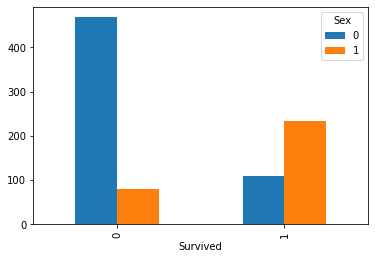

In [15]:
survived_ct("Sex")

 #### Sex
 교차분석 결과를 보면 카이제곱값이 260.72일때 유의확률은 0.00으로 유의수준이 0.05일때 유의한 차이를 갖는다 볼 수 있다. 교차표를 봐도 차이가 있음을 확인 할 수 있다.

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
AxesSubplot(0.125,0.125;0.775x0.755)
(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))


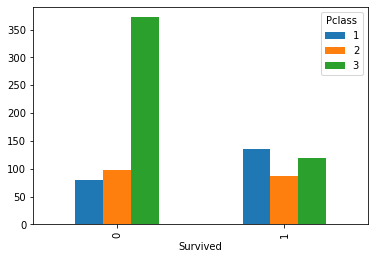

In [16]:
survived_ct("Pclass")

#### Pclass
카이제곱값이 102.89일때 유의확률은 0.00으로 유의수준 0.05에서 유의한 차이를 갖는다 볼 수 있다. 교차표를 봐도 차이가 있음을 볼 수 있다.

Embarked  0.0  1.0  2.0
Survived               
0         427   75   47
1         219   93   30
AxesSubplot(0.125,0.125;0.775x0.755)
(25.964452881874788, 2.300862648144953e-06, 2, array([[398.04040404, 103.51515152,  47.44444444],
       [247.95959596,  64.48484848,  29.55555556]]))


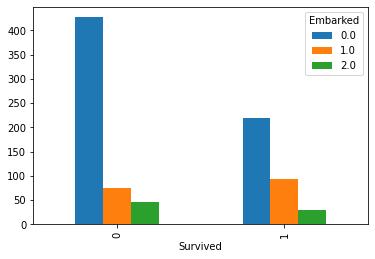

In [17]:
survived_ct("Embarked")

#### Embarked
카이제곱값이 25.96일때 유의확률이 0.00으로 0.05 유의수준에 유의한 차이가 있다고 볼 수 있다. 교차표에서도 상당한 차이가 보인다.

연속형 변수
- Age   SibSp	Parch	Fare

In [18]:
#Age 결측값 평균값으로 채우기
train["Age"].isnull().sum()

177

In [19]:
train.groupby("Survived")[["Age"]].mean()

,Age
Survived,
0,30.626179
1,28.343690


In [20]:
age_mean0=train[train.Survived==0]["Age"].mean()
age_mean1=train[train.Survived==1]["Age"].mean()

In [21]:
train.loc[train.Survived==0,"Age"]=train[train.Survived==0]["Age"].fillna(age_mean0)
train.loc[train.Survived==1,"Age"]=train[train.Survived==1]["Age"].fillna(age_mean1)

In [22]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

분산분석 

In [23]:
def survived_mean(feature):
    df=train.groupby("Survived")[[feature]].mean()
    
    survived =train[train['Survived']==1][feature].values
    dead =train[train['Survived']==0][feature].values
    F_test = stats.f_oneway(survived, dead)
    sns.boxplot(train["Survived"], train[feature])
    print(df)
    print(F_test)
    

                Age
Survived           
0         30.626179
1         28.343690
F_onewayResult(statistic=6.525687367945036, pvalue=0.010798379035661262)


C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


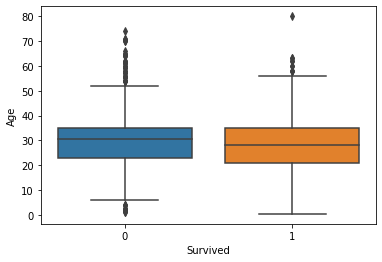

In [24]:
survived_mean("Age")

F통계량 값이 6.53일때 유의확률이 0.05유의수준에 0.05보다 작으니 유의한 차이가 있다고 볼 수있다.

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


             SibSp
Survived          
0         0.553734
1         0.473684
F_onewayResult(statistic=1.110572204113227, pvalue=0.29224392869817906)


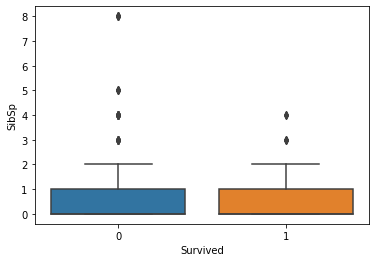

In [25]:
survived_mean("SibSp")

F통계량 값이 1.11일때 유의확률이 0.05유의수준에 0.05보다 크니 유의한 차이가 있다고 볼 수 없다.

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


             Parch
Survived          
0         0.329690
1         0.464912
F_onewayResult(statistic=5.963463836603541, pvalue=0.0147992453747224)


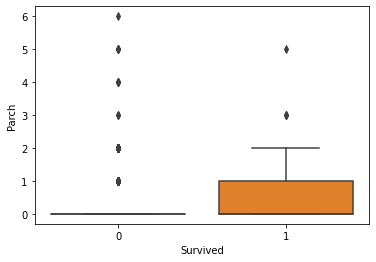

In [26]:
survived_mean("Parch")

F통계량 값이 5.96일때 유의확률이 0.05유의수준에 0.05보다 작으니 유의한 차이가 있다고 볼 수 있다.

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


               Fare
Survived           
0         22.117887
1         48.395408
F_onewayResult(statistic=63.03076422804448, pvalue=6.120189341921873e-15)


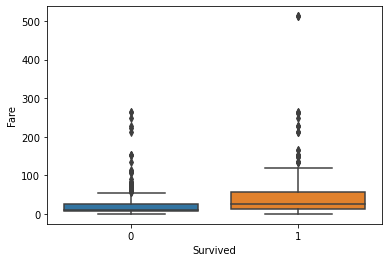

In [27]:
survived_mean("Fare")

F통계량 값이 63.03일때 유의확률이 0.05유의수준에 0.05보다 작으니 유의한 차이가 있다고 볼 수 있다.

사후검정
Age SibSp Parch Fare

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [29]:
def after(feature):
    tukey = pairwise_tukeyhsd(endog = train[feature], groups = train["Survived"],
                         alpha= 0.05)
    print(tukey.summary())

In [30]:
after("Age")

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -2.2825 0.0108 -4.0361 -0.5289   True
----------------------------------------------------


In [31]:
after("SibSp")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     0      1    -0.08 0.2922 -0.2291 0.069  False
--------------------------------------------------


In [32]:
after("Parch")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.1352 0.0148 0.0265 0.2439   True
--------------------------------------------------


In [33]:
after("Fare")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  26.2775 0.001 19.7815 32.7735   True
---------------------------------------------------


로지스틱 분석

In [34]:
import statsmodels.formula.api as smf

In [35]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,30.626179,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [37]:
logit_model = smf.logit("Survived ~ C(Pclass)+C(Sex)+Age+SibSp+Parch+Fare+C(Embarked)",
                   data = train).fit()

Optimization terminated successfully.
         Current function value: 0.437719
         Iterations 6


In [41]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.3427
Time:                        14:35:36   Log-Likelihood:                -390.01
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 5.247e-82
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0805      0.406      2.658      0.008       0.284       1.877
C(Pclass)[T.2]        -0.9653      0.299     -3.231      0.001      -1.551      -0.380
C(Pclass)[T.3]        -2.1996      0.299     -7.359      0.000      -2.785      -1.614
C(Sex)[T.1]            2.7179      0.202     13.478      0.000       2.323       3.113
C(Embarked)[T.1.0]     0.4352      0.241      1.808      0.071      -0.037       0.907
C(Embarked)[T.2.0]     0.4056      0.335      1.212      0.226      -0.250       1.062
Age                   -0.0423      0.008     -5.330      0.000      -0.058      -0.027
SibSp                 -0.3320      0.111     -3.001      0.003      -0.549      -0.115
Parch                 -0.0985      0.120     -0.822      0.411      -0.333       0.136
Fare                   0.0022      0.002      0.907      0.365      -0.003       0.007
======================================================================================
"""

In [42]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.343     
Dependent Variable:  Survived         AIC:              800.0159  
Date:                2021-02-15 14:35 BIC:              847.9394  
No. Observations:    891              Log-Likelihood:   -390.01   
Df Model:            9                LL-Null:          -593.33   
Df Residuals:        881              LLR p-value:      5.2469e-82
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept           1.0805   0.4064  2.6584 0.0079  0.2839  1.8771
C(Pclass)[T.2]     -0.9653   0.2988 -3.2312 0.0012 -1.5509 -0.3798
C(Pclass)[T.3]     -2.1996   0.2989 -7.3593 0.0000 -2.7854 -1.6138
C(Sex)[T.1]         2.7179   0.2017 13.4776 0.0000  2.3227  3.1132
C(Embarked)[T.1.0]  0.4352   0.2407  1.8078 0.0706 -0.0366  0.9070
C(Embarked)[T.2.0]  0.4056   0.3347  1.2116 0.2257 -0.2505  1.0617
Age                -0.0423   0.0079 -5.3304 0.0000 -0.0579 -0.0268
SibSp              -0.3320   0.1106 -3.0014 0.0027 -0.5488 -0.1152
Parch              -0.0985   0.1197 -0.8223 0.4109 -0.3331  0.1362
Fare                0.0022   0.0025  0.9066 0.3646 -0.0026  0.0071
==================================================================

"""

In [46]:
#오즈값 구하기
np.exp(logit_model.params)

Intercept              2.946177
C(Pclass)[T.2]         0.380859
C(Pclass)[T.3]         0.110852
C(Sex)[T.1]           15.149085
C(Embarked)[T.1.0]     1.545253
C(Embarked)[T.2.0]     1.500178
Age                    0.958552
SibSp                  0.717491
Parch                  0.906231
Fare                   1.002240
dtype: float64

In [47]:
#예측값
predict = pd.DataFrame({"predict":logit_model.predict()})

In [52]:
train_pred=train.copy()

In [53]:
train_pred["predict"]=predict
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265


In [54]:
# 0.5미만이면 0 0.5이상이면 1로 구분
def pre_group(series):
    if series<0.5:
        return 0
    else:
        return 1

In [55]:
train_pred["pre_group"]=train_pred["predict"].apply(pre_group)
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict,pre_group
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794,0
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750,1
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216,1
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262,1
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265,0


In [56]:
pd.crosstab(train_pred.Survived, train_pred.pre_group, margins=True, normalize =True)

pre_group,0,1,All
Survived,,,
0,0.534231,0.081930,0.616162
1,0.114478,0.269360,0.383838
All,0.648709,0.351291,1.000000


예측 정확도가 80프로 정도 되는 것을 확인 할 수있다.

In [58]:
logit_model2 = smf.logit("Survived ~ C(Pclass)+C(Sex)+Age+SibSp+Parch",
                       data = train).fit()

Optimization terminated successfully.
         Current function value: 0.440951
         Iterations 6


In [59]:
logit_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.338     
Dependent Variable: Survived         AIC:              799.7748  
Date:               2021-02-15 14:50 BIC:              833.3212  
No. Observations:   891              Log-Likelihood:   -392.89   
Df Model:           6                LL-Null:          -593.33   
Df Residuals:       884              LLR p-value:      1.8080e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          1.4387   0.3541  4.0628 0.0000  0.7446  2.1327
C(Pclass)[T.2]    -1.2212   0.2629 -4.6444 0.0000 -1.7366 -0.7059
C(Pclass)[T.3]    -2.3903   0.2444 -9.7805 0.0000 -2.8693 -1.9113
C(Sex)[T.1]        2.7676   0.1993 13.8865 0.0000  2.3770  3.1582
Age               -0.0435   0.0079 -5.5035 0.0000 -0.0589 -0.0280
SibSp             -0.3436   0.1097 -3.1329 0.0017 -0.5586 -0.1287
Parch             -0.0832   0.1154 -0.7217 0.4705 -0.3093  0.1428
=================================================================

"""

In [61]:
np.exp(logit_model2.params)

Intercept          4.215084
C(Pclass)[T.2]     0.294866
C(Pclass)[T.3]     0.091599
C(Sex)[T.1]       15.919958
Age                0.957477
SibSp              0.709182
Parch              0.920125
dtype: float64

In [62]:
predict2 = pd.DataFrame({"predict2":logit_model2.predict()})
predict2.head()

,predict2
0,0.095238
1,0.901265
2,0.665101
3,0.912274
4,0.077805


In [63]:
train_pred["predict2"] = predict2
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict,pre_group,predict2
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794,0,0.095238
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750,1,0.901265
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216,1,0.665101
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262,1,0.912274
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265,0,0.077805


In [64]:
train_pred["pre_group2"] = train_pred["predict2"].apply(pre_group)
train_pred.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict,pre_group,predict2,pre_group2
0,0,3,0,22.0,1,0,7.2500,0.0,0.085794,0,0.095238,0
1,1,1,1,38.0,1,0,71.2833,1.0,0.920750,1,0.901265,1
2,1,3,1,26.0,0,0,7.9250,0.0,0.626216,1,0.665101,1
3,1,1,1,35.0,1,0,53.1000,0.0,0.891262,1,0.912274,1
4,0,3,0,35.0,0,0,8.0500,0.0,0.070265,0,0.077805,0


In [65]:
pd.crosstab(train_pred.Survived, train_pred.pre_group2, margins=True, normalize =True)

pre_group2,0,1,All
Survived,,,
0,0.518519,0.097643,0.616162
1,0.107744,0.276094,0.383838
All,0.626263,0.373737,1.000000


정확도가 79프로 정도 되는것으로 보여진다.

#### 기준에 둔 수에따른 정확도 분석

In [67]:
def cut_off(target, threshold):
    Target = target.copy()
    Target[Target>=threshold]=1
    Target[Target<threshold]=0
    return(Target.astype(int))

In [69]:
threshold = np.arange(0.1, 1, 0.1)
table = pd.DataFrame(columns = ['Ace'])

for i in threshold:
    predict = cut_off(predict2, i)
    df= train_pred[["Survived"]].join(predict["predict2"])
    matrix=pd.crosstab(df.Survived, df.predict2, normalize = True)
    table.loc[i] = (matrix.iloc[0,0] + matrix.iloc[1,1]) #/len(predict2)
table.index.name = "threshold"
table.columns.name ="performance"
table

performance,Ace
threshold,
0.1,0.594837
0.2,0.713805
0.3,0.769921
0.4,0.793490
0.5,0.794613
0.6,0.812570
0.7,0.793490
0.8,0.764310
0.9,0.695847


0.6으로 분석 할 때 가장 정확도가 높다.

오버피팅 피하기위한 Train/Test로 

In [70]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [71]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression()

In [72]:
#로지스틱 회귀모형에 독립변수와 종속변수를 넣어 적합 시켜주자
lr_model.fit(X,y)

C:\Users\201710612\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
y_pred=lr_model.predict(X)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
#예측정확도
accuracy_score(y,y_pred)

0.8069584736251403

In [76]:
X_dum = pd.get_dummies(X, columns = ["Pclass","Sex","Embarked"], drop_first=True)

In [77]:
lr_model2 =LogisticRegression()

In [78]:
lr_model2.fit(X_dum, y)

C:\Users\201710612\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
y_pred = lr_model2.predict(X_dum)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [80]:
accuracy_score(y,y_pred)

0.8058361391694725

In [81]:
#계수
np.exp(lr_model2.coef_)

array([[ 0.96107299,  0.72560466,  0.91018317,  1.0032667 ,  0.46304975,
         0.1411259 , 13.28394853,  1.51969849,  1.45947845]])

In [82]:
coef_=np.ravel(lr_model2.coef_)

In [83]:
np.exp(lr_model2.coef_)

array([[ 0.96107299,  0.72560466,  0.91018317,  1.0032667 ,  0.46304975,
         0.1411259 , 13.28394853,  1.51969849,  1.45947845]])

<AxesSubplot:>

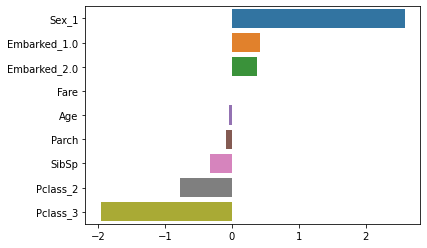

In [84]:
coef = pd.Series(coef_,index=X_dum.columns)
coef_sort=coef.sort_values(ascending =False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)